# Determining intrinsic $P(k)$ from gridded data

[Jing 1995](http://adsabs.harvard.edu/abs/2005ApJ...620..559J) worked out how to determine the true power $P(k)$ from a gridded Fourier transform.

In [2]:
# Import some routines
%matplotlib inline
from array_io import *
import numpy as np
import matplotlib.pyplot as plt
from read_grid_fft import *

# Start with Nearest Grid Point interpolation

## Plot the distribution of particle positions in x-y plane

0.0001510363 0.9999578
0.000204247 0.9999855
3.36864e-05 0.9998738


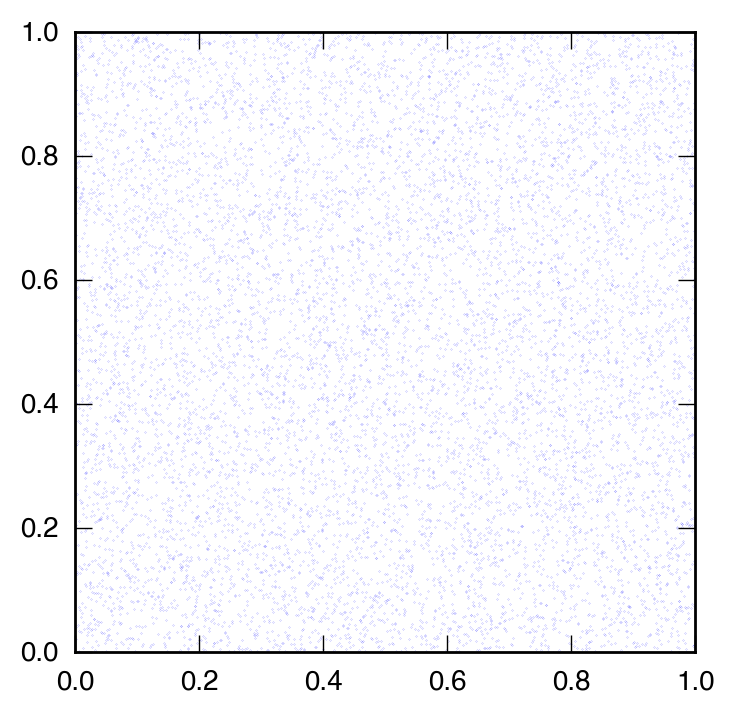

In [17]:
idx = 0
fdir = "ngp/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')

print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

## Plot the uniformly distributed set of particles, interpolated onto a grid

(64, 64, 64)


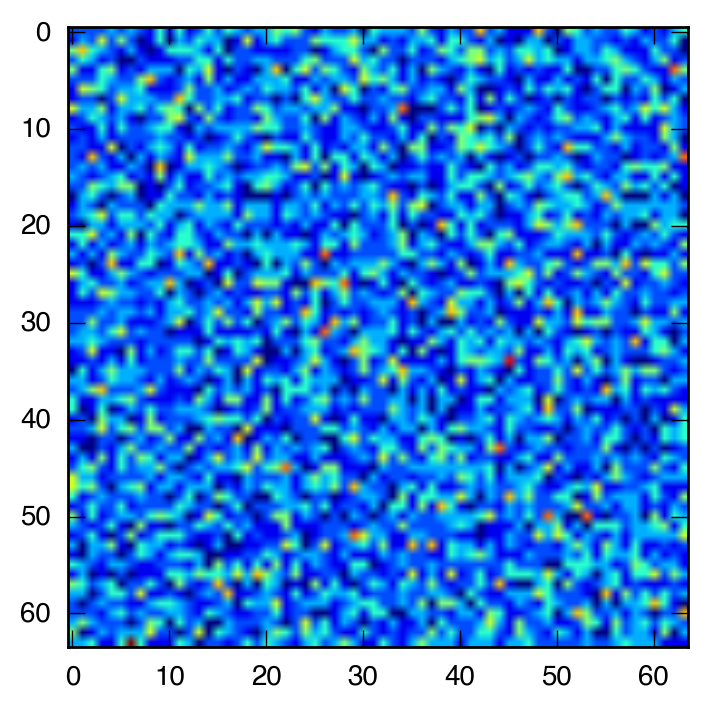

In [18]:
#Read in the three dimensional grid, and project it into 2 dimensions
idx = 0
fdir = "ngp/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

## Plot the 3D Fourier amplitudes $\delta^f(\vec{k})$, projected into 2D 

(64, 64, 64)


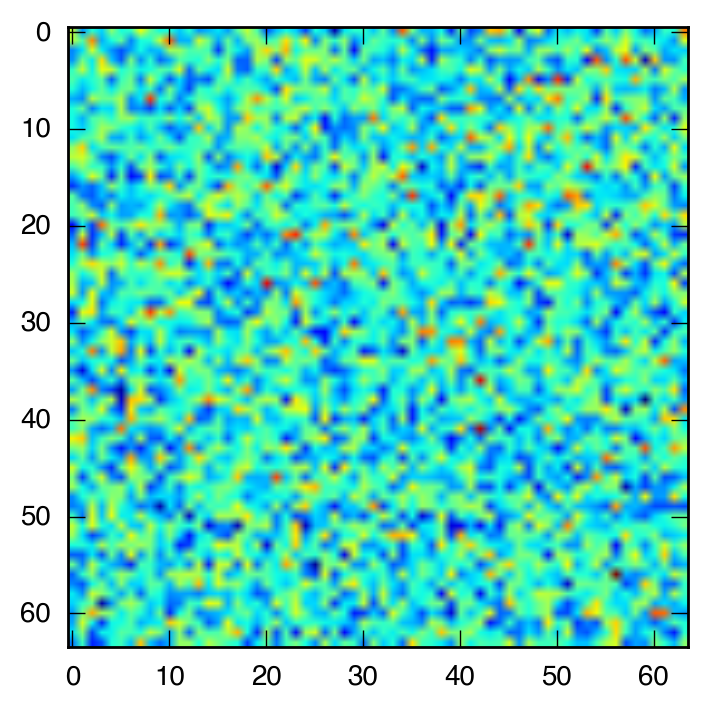

In [19]:
#Read in a delta^f_k grid

idx = 0
fdir = "ngp/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction

10000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.03781289  0.024713    0.01855182  0.01645626  0.01217246
  0.01162738  0.00953152  0.00876295  0.00777105  0.00704976  0.00664475
  0.00598798  0.00550056  0.00531616  0.00488416  0.00469737  0.00432032
  0.00417258  0.00391996  0.00377208  0.00359086  0.00346058  0.00328052
  0.00319306  0.00300206  0.00293088  0.00277935  0.00277488  0.00261206
  0.00260243  0.00243892  0.00240727]
[ 0.          1.00043491  0.95713053  0.98166987  1.02769306  0.99635899
  0.99344355  1.00420826  0.99913052  1.00724375  0.98696681  1.00333597
  0.99659833  1.00073899  0.9959815   1.00214681  0.99646354  0.99929235
  1.00141974  0.9986285   1.00226787  0.99900764  1.00535595  1.00042405
  0.99907603  0.99793069  0.99865236  0.99281653  0.9989577   1.00079782
  1.00488874  0.99817221  0.99662063]


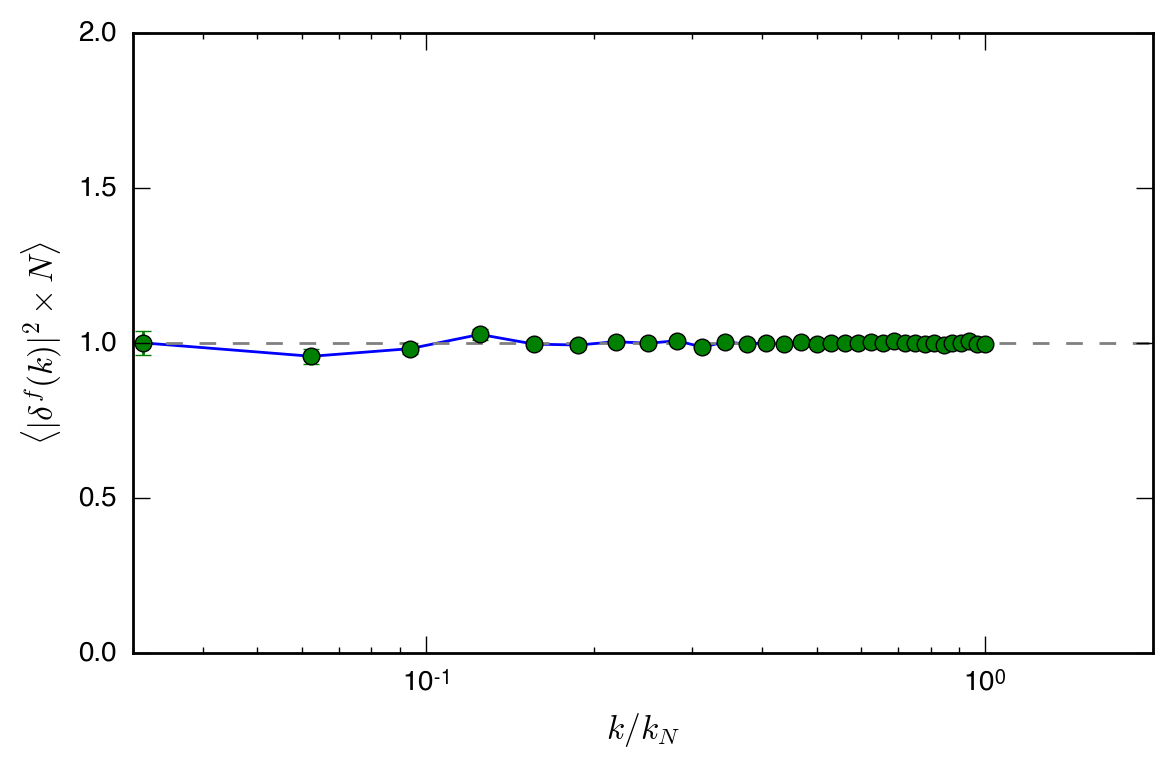

In [20]:
fdir  = "ngp/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
plt.plot(k_array,dfk_array/nk_array * float(N))
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)


# Now do Cloud In Cell Interpolation

## Plot the distribution of particle positions in x-y plane

0.0001510363 0.9999578
0.000204247 0.9999855
3.36864e-05 0.9998738


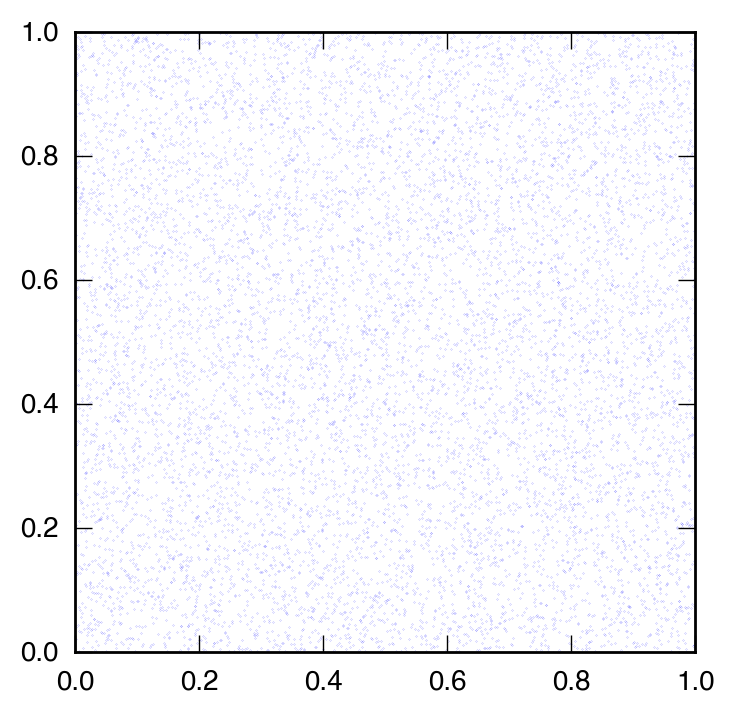

In [22]:
idx = 0
fdir = "cic/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')

print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

## Plot the uniformly distributed set of particles, interpolated onto a grid

(64, 64, 64)


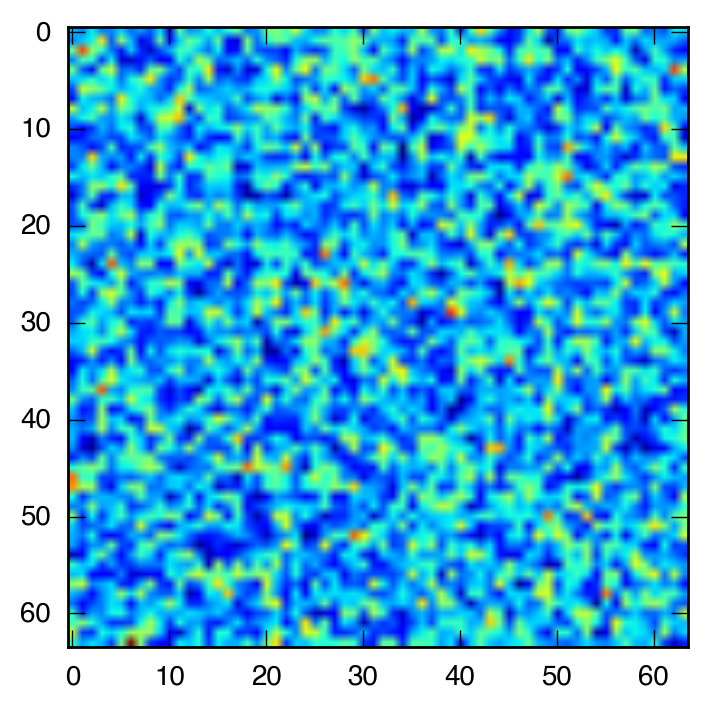

In [23]:
#Read in the three dimensional grid, and project it into 2 dimensions
idx = 0
fdir = "cic/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

## Plot the 3D Fourier amplitudes $\delta^f(\vec{k})$, projected into 2D

I'll first plot NGP, then CIC to show the difference.

(64, 64, 64)


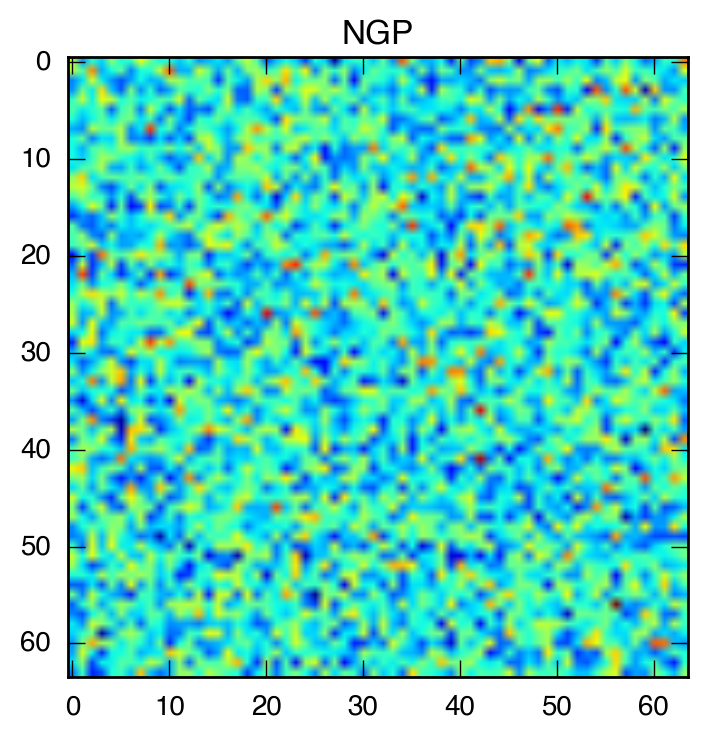

(64, 64, 64)


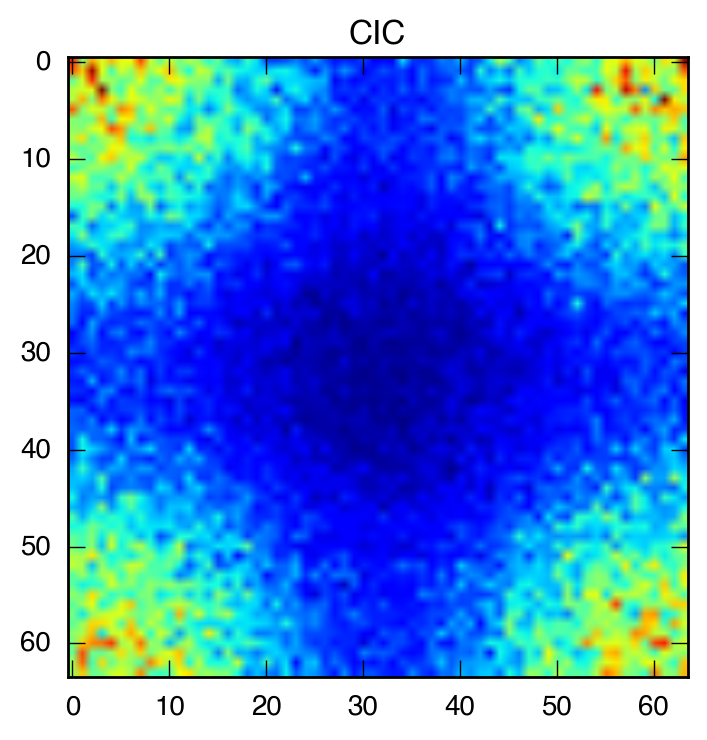

In [28]:
#Read in a delta^f_k grid

idx = 0
fdir = "ngp/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'NGP')
plt.imshow(dfkp.T)
plt.show()

#Read in a delta^f_k grid
plt.clf()

idx = 0
fdir = "cic/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'CIC')
plt.imshow(dfkp.T)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction

10000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.03776048  0.02446256  0.01824248  0.01595297  0.01162058
  0.01092095  0.00870395  0.00784728  0.00670866  0.00592813  0.00536683
  0.00466028  0.0041165   0.00380511  0.00334951  0.00304131  0.00266202
  0.00242981  0.00214752  0.00194566  0.00174513  0.00157003  0.00140086
  0.00127268  0.00111251  0.0010173   0.00090154  0.00084393  0.0007415
  0.00069322  0.0006147   0.00057605]
[ 0.          0.99904828  0.94743071  0.96530129  0.99626295  0.95118568
  0.93308613  0.917018    0.89472748  0.86954172  0.8299378   0.81037409
  0.77562564  0.74893231  0.71288658  0.68726143  0.6451602   0.61572764
  0.58315542  0.54709221  0.51697595  0.48550884  0.4561202   0.42720617
  0.39820902  0.36981702  0.34663073  0.32203946  0.30381606  0.28410383
  0.26767699  0.25157741  0.23848721]


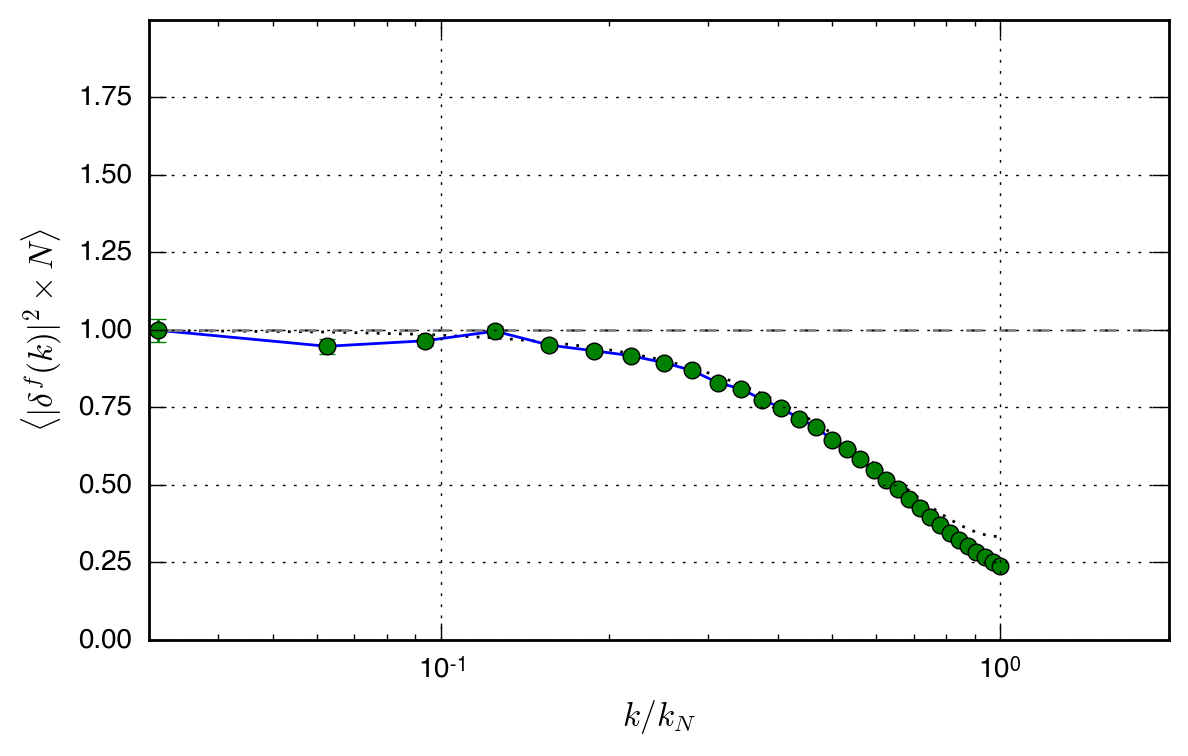

In [42]:
fdir  = "cic/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
                    
fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()
C1k = 1.0 - (2./3.)*np.sin(0.5*np.pi*k_array)**2
plt.plot(k_array,C1k,':',color="0")
plt.plot(k_array,dfk_array/nk_array * float(N))
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction, corrected for shot noise of the interpolation.

#### The green points show an isotropic approximation, while the red shows the anisotropic analytical result.

100000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an in

[ 0.          0.04063426  0.02597762  0.01843972  0.01515429  0.01167603
  0.01113613  0.00858091  0.00792133  0.00672473  0.00600213  0.0053879
  0.00465983  0.00410285  0.0038307   0.00331697  0.00305959  0.00266689
  0.0024218   0.00214864  0.00194164  0.00174378  0.0015604   0.00139702
  0.00127125  0.00111365  0.00101495  0.00090837  0.00084271  0.00073791
  0.00068994  0.00061664  0.00057759]
[ 0.          1.07508149  1.00610879  0.97573834  0.94638524  0.95572409
  0.95147135  0.90405524  0.90317022  0.87162519  0.84029856  0.81355574
  0.77554955  0.74644742  0.71768118  0.6805852   0.64903684  0.61685309
  0.58123309  0.54737664  0.51590717  0.48513361  0.45332336  0.42603238
  0.39776008  0.370196    0.34582974  0.32447986  0.3033741   0.28272689
  0.26641162  0.25236984  0.2391245 ]


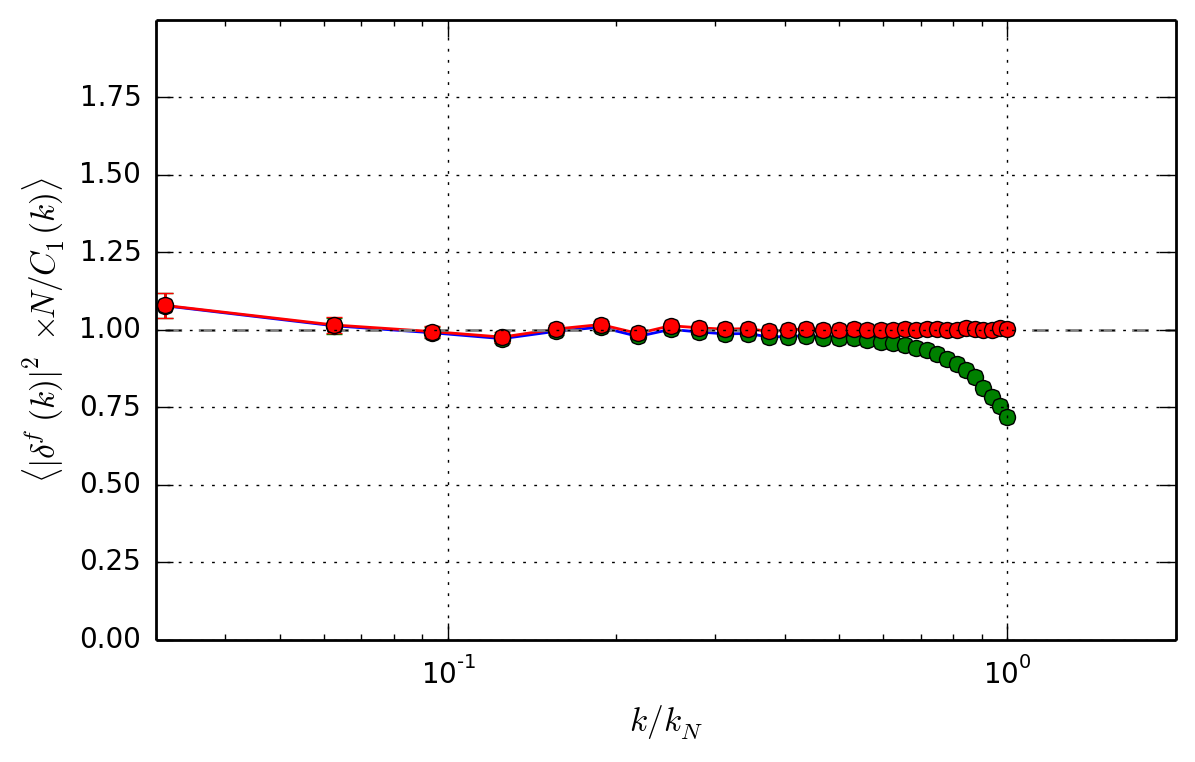

In [13]:
fdir  = "cic/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
dfk_C1k_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)
kN = 0.5*float(nx)


for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]
                dfk_C1k_array[kk] += dfk[i,j,k] /((1.-(2./3.)*np.sin(0.5*np.pi*i/kN)**2)* (1.-(2./3.)*np.sin(0.5*np.pi*j/kN)**2)* (1.-(2./3.)*np.sin(0.5*np.pi*k/kN)**2))


nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
                    dfk_C1k_array[kk] += dfk[i,j,k] /( (1.-(2./3.)*np.sin(0.5*np.pi*i/kN)**2)* (1.-(2./3.)*np.sin(0.5*np.pi*j/kN)**2)* (1.-(2./3.)*np.sin(0.5*np.pi*k/kN)**2))


                    
C1k = 1.0 - (2./3.)*np.sin(0.5*np.pi*k_array)**2

fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()

plt.plot(k_array,dfk_array/nk_array * float(N) / C1k)
plt.plot(k_array,dfk_C1k_array/nk_array * float(N), color="red")

yerr = dfk_array*N /nk_array/ (nk_array)**0.5
ycerr = dfk_C1k_array*N /nk_array/ (nk_array)**0.5


print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0

plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N) / C1k, yerr=yerr, fmt='o')
plt.errorbar(k_array,dfk_C1k_array/nk_array * float(N), yerr=ycerr, fmt='o', color="red")

plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N / C_1(k)\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)


# Now do Triangular Shaped Cloud Interpolation

## Plot the distribution of particle positions in x-y plane

1.310837e-06 0.9999893
4.537869e-06 0.9999997
1.814775e-05 0.9999986


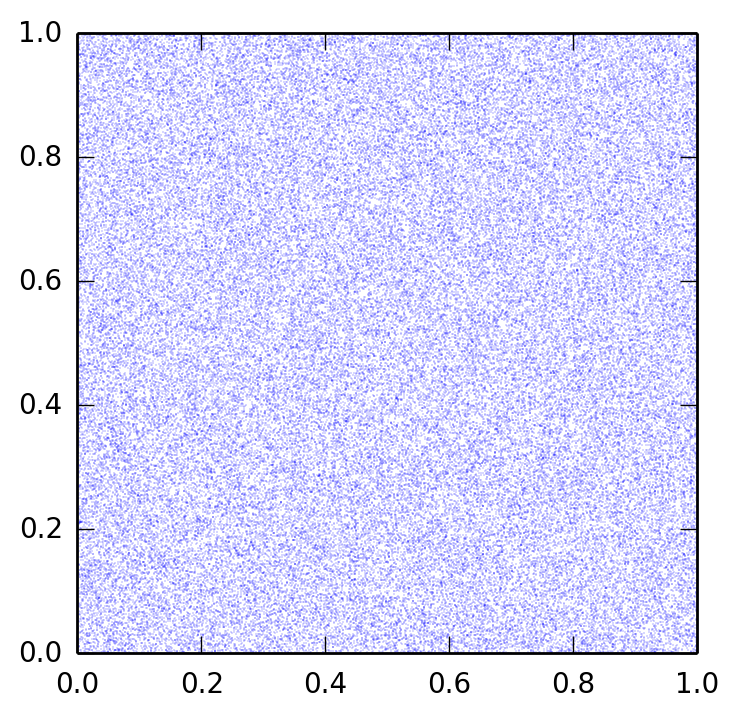

In [2]:
idx = 0
fdir = "tsc/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')

print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

## Plot the uniformly distributed set of particles, interpolated onto a grid

(64, 64, 64)


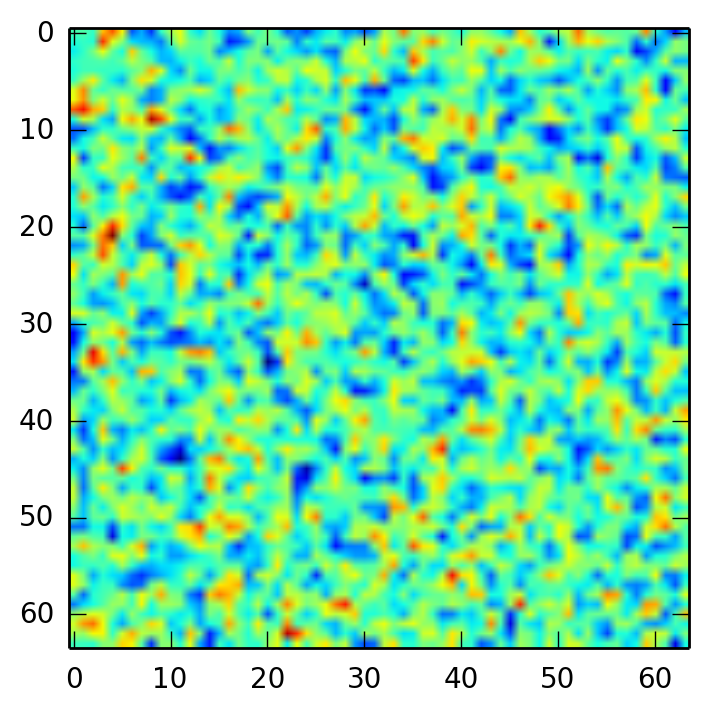

In [3]:
#Read in the three dimensional grid, and project it into 2 dimensions
idx = 0
fdir = "tsc/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

## Plot the 3D Fourier amplitudes $\delta^f(\vec{k})$, projected into 2D

I'll first plot NGP, then CIC, then TSC to show the difference.

(64, 64, 64)


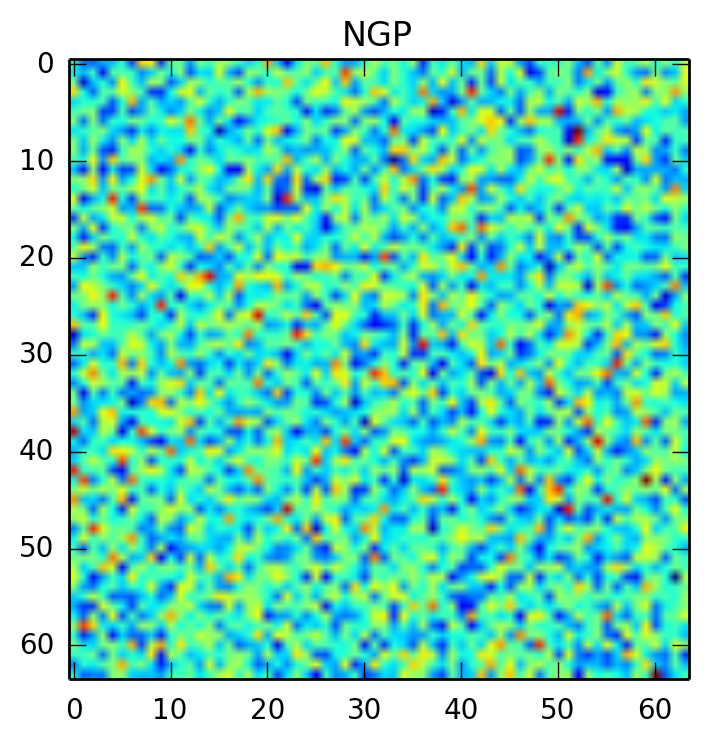

(64, 64, 64)


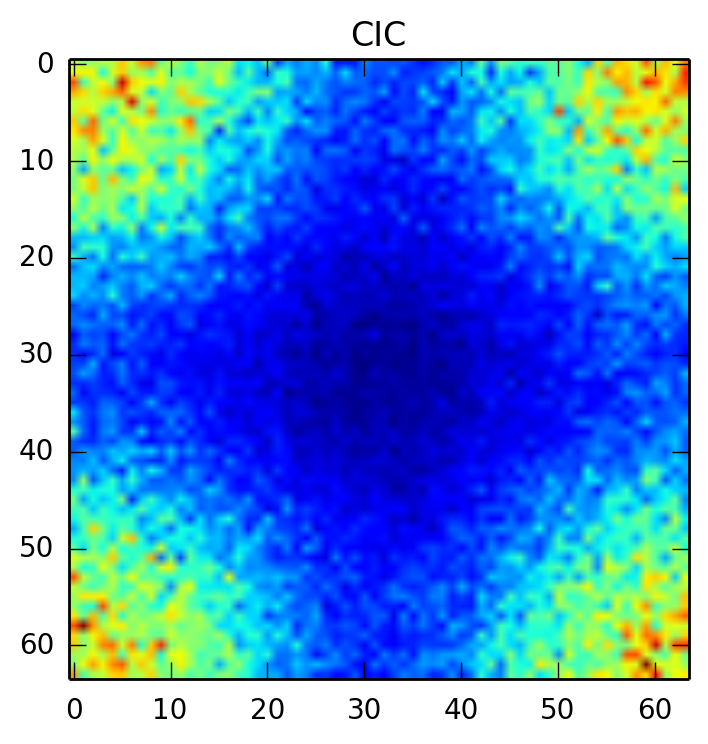

(64, 64, 64)


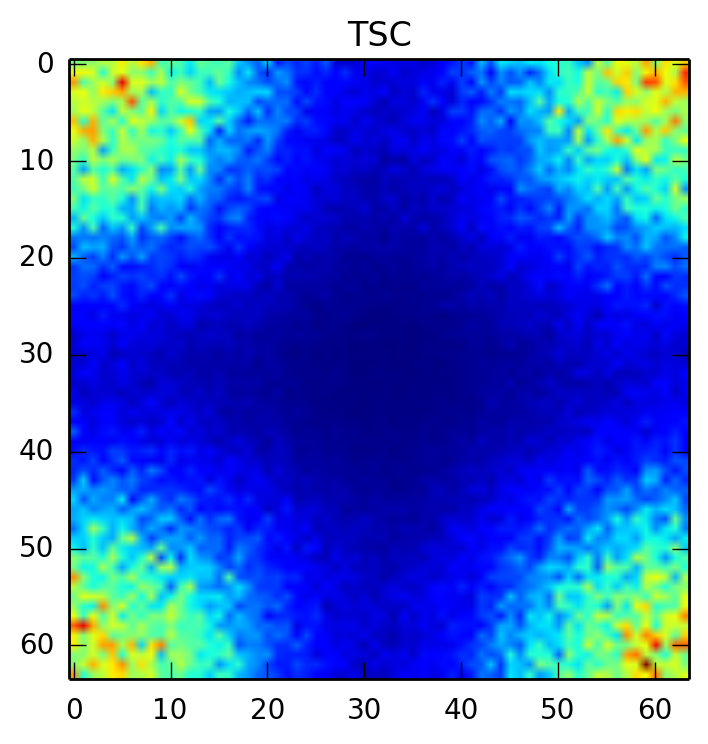

In [4]:
#Read in a delta^f_k grid

idx = 0
fdir = "ngp/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'NGP')
plt.imshow(dfkp.T)
plt.show()

#Read in a delta^f_k grid
plt.clf()

idx = 0
fdir = "cic/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'CIC')
plt.imshow(dfkp.T)
plt.show()

#Read in a delta^f_k grid
plt.clf()

idx = 0
fdir = "tsc/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'TSC')
plt.imshow(dfkp.T)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction

100000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.04057786  0.025861    0.01827062  0.01492369  0.01140289
  0.01077118  0.0082044   0.00747414  0.00625022  0.00548793  0.00484042
  0.00410199  0.00353144  0.00321506  0.00271568  0.00243343  0.00205739
  0.00180755  0.00154821  0.0013459   0.00116064  0.00099499  0.00084792
  0.00073581  0.00061108  0.00052654  0.00044506  0.00038866  0.00032108
  0.00028316  0.0002387   0.00021236]
[ 0.          1.07358937  1.0015921   0.96679052  0.93198432  0.93336706
  0.92028983  0.86438691  0.85218255  0.8101215   0.76831075  0.73088775
  0.68270638  0.64248887  0.60234101  0.55721097  0.51620922  0.47587624
  0.43381082  0.39441498  0.35761386  0.3229      0.28906098  0.25858104
  0.23022857  0.2031311   0.17940938  0.15898049  0.13991687  0.12302016
  0.10933762  0.09769186  0.0879196 ]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:1171: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


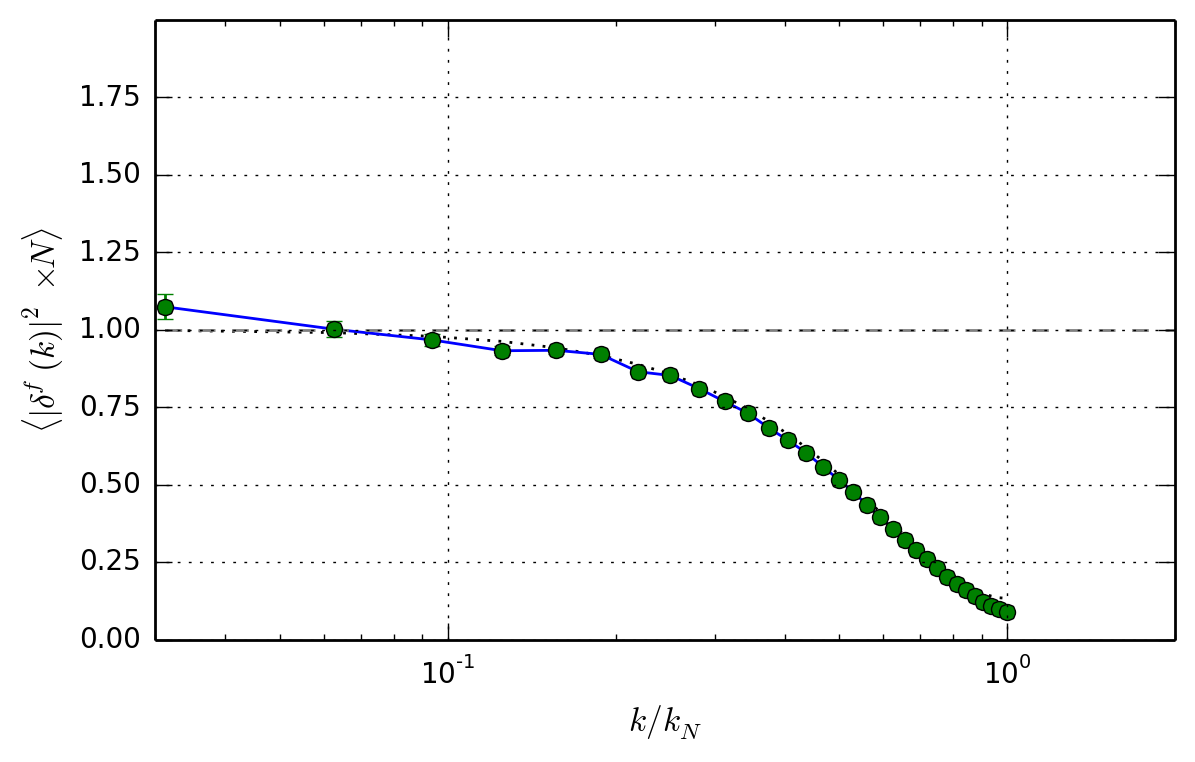

In [5]:
fdir  = "tsc/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
                    
fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()
C1k = 1.0 - np.sin(0.5*np.pi*k_array)**2 + (2./15.)*np.sin(0.5*np.pi*k_array)**4

plt.plot(k_array,C1k,':',color="0")
plt.plot(k_array,dfk_array/nk_array * float(N))
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction, corrected for shot noise of the interpolation.

#### The green points show an isotropic approximation, while the red shows the anisotropic analytical result.

100000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:54: VisibleDeprecationWarning: using a non-integer number instead of an in

[ 0.          0.04057786  0.025861    0.01827062  0.01492369  0.01140289
  0.01077118  0.0082044   0.00747414  0.00625022  0.00548793  0.00484042
  0.00410199  0.00353144  0.00321506  0.00271568  0.00243343  0.00205739
  0.00180755  0.00154821  0.0013459   0.00116064  0.00099499  0.00084792
  0.00073581  0.00061108  0.00052654  0.00044506  0.00038866  0.00032108
  0.00028316  0.0002387   0.00021236]
[ 0.          1.07358937  1.0015921   0.96679052  0.93198432  0.93336706
  0.92028983  0.86438691  0.85218255  0.8101215   0.76831075  0.73088775
  0.68270638  0.64248887  0.60234101  0.55721097  0.51620922  0.47587624
  0.43381082  0.39441498  0.35761386  0.3229      0.28906098  0.25858104
  0.23022857  0.2031311   0.17940938  0.15898049  0.13991687  0.12302016
  0.10933762  0.09769186  0.0879196 ]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:1171: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))


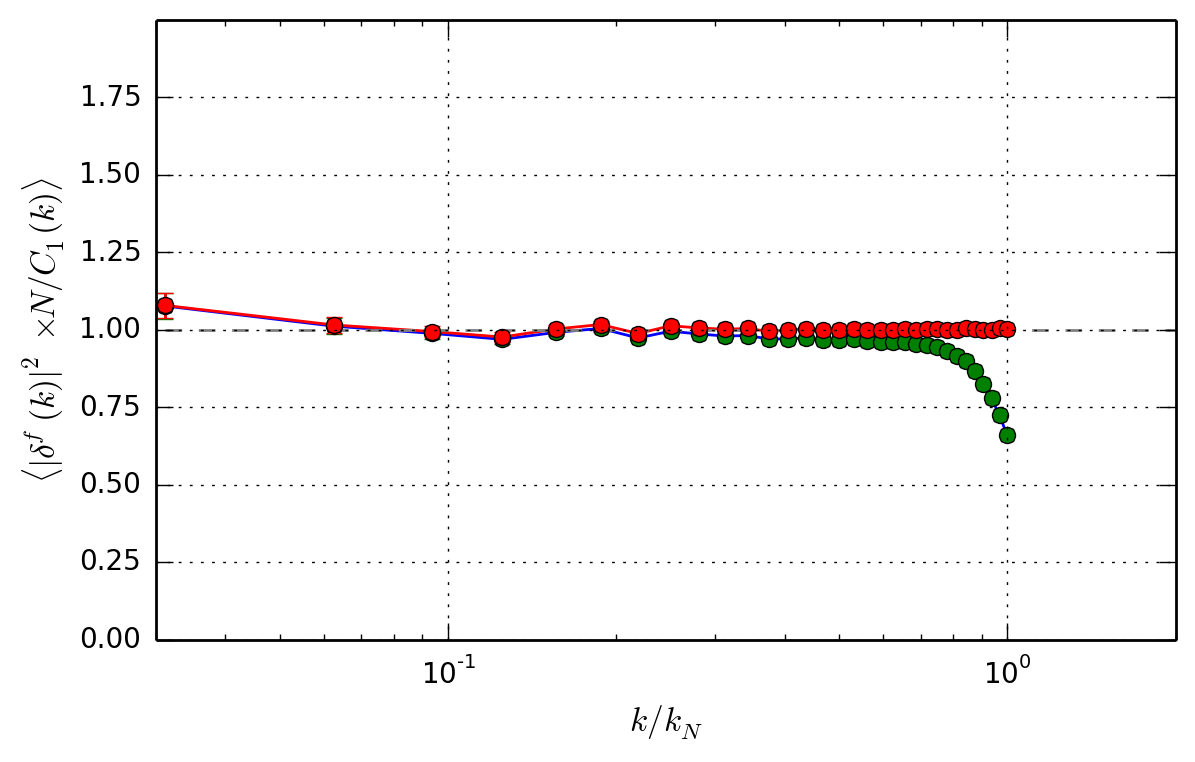

In [14]:
fdir  = "tsc/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
dfk_C1k_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)
kN = 0.5*float(nx)

#define interpolation
p = 3 # TSC

for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]
                #C1k =  1.0 - np.sin(0.5*np.pi*i/kN)**2 + (2./15.)*np.sin(0.5*np.pi*i/kN)**4
                #C1k *= 1.0 - np.sin(0.5*np.pi*j/kN)**2 + (2./15.)*np.sin(0.5*np.pi*j/kN)**4
                #C1k *= 1.0 - np.sin(0.5*np.pi*k/kN)**2 + (2./15.)*np.sin(0.5*np.pi*k/kN)**4
                dfk_C1k_array[kk] += dfk[i,j,k] / C1k(i,j,k,kN,p)


nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
                    #C1k =  1.0 - np.sin(0.5*np.pi*i/kN)**2 + (2./15.)*np.sin(0.5*np.pi*i/kN)**4
                    #C1k *= 1.0 - np.sin(0.5*np.pi*j/kN)**2 + (2./15.)*np.sin(0.5*np.pi*j/kN)**4
                    #C1k *= 1.0 - np.sin(0.5*np.pi*k/kN)**2 + (2./15.)*np.sin(0.5*np.pi*k/kN)**4
                    dfk_C1k_array[kk] += dfk[i,j,k] / C1k(i,j,k,kN,p)
                    
C1ki = 1.0 - np.sin(0.5*np.pi*k_array)**2 + (2./15.)*np.sin(0.5*np.pi*k_array)**4


fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()

plt.plot(k_array,dfk_array/nk_array * float(N) / C1ki)
plt.plot(k_array,dfk_C1k_array/nk_array * float(N), color="red")

yerr = dfk_array*N /nk_array/ (nk_array)**0.5
ycerr = dfk_C1k_array*N /nk_array/ (nk_array)**0.5


print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0

plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N) / C1ki, yerr=yerr, fmt='o')
plt.errorbar(k_array,dfk_C1k_array/nk_array * float(N), yerr=ycerr, fmt='o', color="red")

plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N / C_1(k)\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)

# Power spectrum of a cosmological simulation

1.292391e-06 0.9999982
7.629395e-08 0.9999998
1.525879e-07 0.9999969


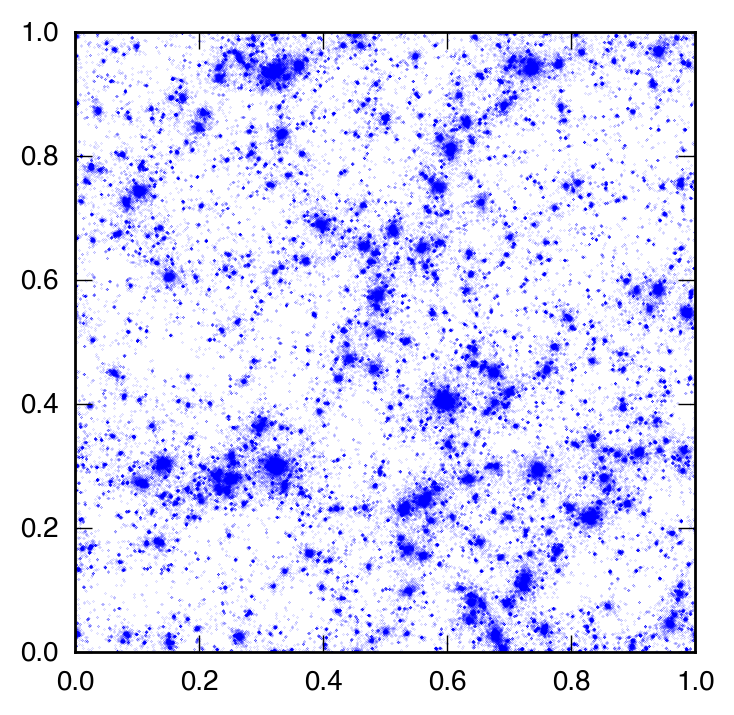

In [33]:
idx = 0
fdir  = "cosmo/"
fpick = "64/"
fdir += fpick
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')

print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

In [5]:
#define the window function

import numpy as np
def Wkp(i,j,k,kN,p):
    if(i==0):
        A = 1.
    else:
        x = 0.5*np.pi*i/kN
        A = np.sin(x)/x
    if(j==0):
        B = 1.
    else:
        y = 0.5*np.pi*j/kN
        B = np.sin(y)/y
    if(k==0):
        C = 1.
    else:
        z = 0.5*np.pi*k/kN
        C = np.sin(z)/z
    #print (x,y,z,A,B,C)
    return (A*B*C)**p

In [11]:
#define the shotnoise term D^2(k) = C_1(k)/N

def C1k(i,j,k,kN,p):
  C1k = 0.0
  if(p==1):
    C1out = 1.0
  elif(p==2):
    C1k =  1.0 - (2./3.)*np.sin(0.5*np.pi*i/kN)**2
    C1k *= 1.0 - (2./3.)*np.sin(0.5*np.pi*j/kN)**2
    C1k *= 1.0 - (2./3.)*np.sin(0.5*np.pi*k/kN)**2
  elif(p==3):
    C1k =  1.0 - np.sin(0.5*np.pi*i/kN)**2 + (2./15.)*np.sin(0.5*np.pi*i/kN)**4
    C1k *= 1.0 - np.sin(0.5*np.pi*j/kN)**2 + (2./15.)*np.sin(0.5*np.pi*j/kN)**4
    C1k *= 1.0 - np.sin(0.5*np.pi*k/kN)**2 + (2./15.)*np.sin(0.5*np.pi*k/kN)**4

  return C1k

In [16]:
#define a Power law power spectrum

def Pplaw(k,kN,A,alpha):
    return A*(k/kN)**alpha

In [34]:
nx = 64.
kN = 0.5*float(nx)

p = 3.0 # TSC

k = kN

alpha = -2.0
print Pplaw(k,kN,1.,alpha)
print Pplaw(k + 1*kN*1,kN,1.,alpha)
print Pplaw(k + 2*kN*1,kN,1.,alpha)
print Pplaw(k + 3*kN*1,kN,1.,alpha)
print Pplaw(k + 10*kN*1,kN,1.,alpha)
print Pplaw(k + 50*kN*1,kN,1.,alpha)

Pplawk = 0.0
for i in range(10000):
    Pplawk += Pplaw(k + 2*kN*i,kN,1.,alpha)
print "Pplawk = ",Pplawk


W2Pplawk = 0.0
for i in range(10000):
    W2Pplawk += Wkp(k+2*kN*i,0,0,kN,p)**2 * Pplaw(k + 2*kN*i,kN,1.,alpha)
print "Pplawk(k=kN) = ",W2Pplawk, Wkp(k,0,0,kN,p)**2 * Pplaw(k,kN,1.,alpha)
k = 0.1*kN
W2Pplawk = 0.0
for i in range(10000):
    W2Pplawk += Wkp(k+2*kN*i,0,0,kN,p)**2 * Pplaw(k + 2*kN*i,kN,1.,alpha)
print "Pplawk(k=0.1*kN) = ",W2Pplawk, Wkp(k,0,0,kN,p)**2 * Pplaw(k,kN,1.,alpha)

1.0
0.25
0.111111111111
0.0625
0.00826446280992
0.000384467512495
Pplawk =  1.23367555014
Pplawk(k=kN) =  0.0665806646105 0.0665703342909
Pplawk(k=0.1*kN) =  97.5608074346 97.560807432


262144
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in log
/Library/Python/2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in log
/Library/Python/2.7/site-packages/ipykernel/__main__.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:81: VisibleDeprecationWarning

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
[-3.63563109 -8.89504635]
(0.00013706622584728763, -3.6356310853085301)
0...
1...
2...
3...
4...
5...
6...
7...
8...
9...
10...
11...
12...
13...
14...
15...
16...
17...
18...
19...
20...
21...
22...
23...
24...
25...
26...
27...
28...
29...
30...
31...
32...
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
(0.00013706622584728763, -3.6356310853085301, 0.0016788295192693254, -0.80281694846777774)
[ -3.81469727e-06   7.23922992e-04   1.11358679e-04   5.98497319e-05
   2.41197888e-05   7.57580686e-06   6.36680608e-06   3.87113697e-06
   1.93058618e-06   1.52623787e-06   1.02573340e-06   7.21923533e-07
   5.28273903e-07   3.40752599e-07   2.62579320e-07   1.76323318e-07
   1.47698063e-07   1.02397290e-07   8.23990500e-08   5.41295868e-08
   4.09716724e-08   3.07978529e-08   2.55229259e-08   1.80600954e-08
   1.38339144e-08   9.64327235e-09   7.78328056e-09   6.09917596e-09
   4.82269618e-09   3.27788084e-09   2.79129767e-09   2.0277

/Library/Python/2.7/site-packages/ipykernel/__main__.py:86: RuntimeWarning: invalid value encountered in divide
/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in power
/Library/Python/2.7/site-packages/ipykernel/__main__.py:95: RuntimeWarning: divide by zero encountered in log
/Library/Python/2.7/site-packages/ipykernel/__main__.py:96: RuntimeWarning: invalid value encountered in log


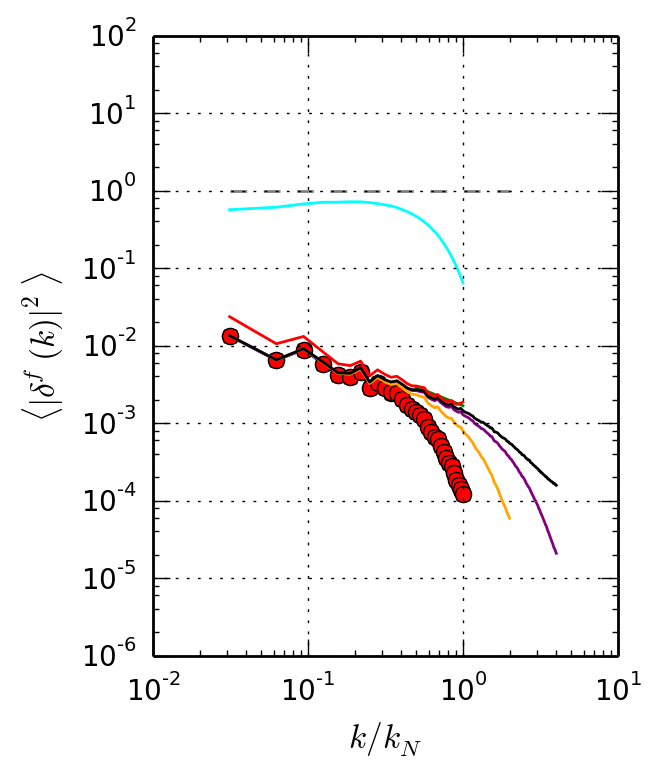

In [51]:
fdir  = "cosmo/"
fpick = "64/"
fdir += fpick

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)


#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
kN = 0.5*float(nx)


nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
Pr_array = np.zeros(nk)
dfk_only_array = np.zeros(nk)


k_array = np.arange(nk) / float(nk-1)


#compute <<|d^f(k)|^2> - D^2(k)>
for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                Pr_array[kk] += dfk[i,j,k] - C1k(i,j,k,kN,p)/float(N)
                dfk_only_array[kk] += dfk[i,j,k]

Pr_array /= nk_array
dfk_only_array /= nk_array


#########################################################
#OK, dfk_only_array has been averaged over angle at this point
#begin iterative procedure

#first, compute power-law fit to Pr_array
lnk  = np.log(k_array)
lnPr = np.log(Pr_array)

ki = np.where( (k_array>=0.5)&(k_array<=1.0) )[0]
print ki

pfit = np.polyfit(lnk[ki],lnPr[ki],1)
print pfit

alpha = pfit[0]
A = np.exp(pfit[1])
print(A,alpha)


#next, compute C2(k) assuming power law for Pk
kipl = np.where(k_array>0)[0]
Pkpl = np.zeros(nk)
Pkpl[kipl] = np.exp(np.poly1d(pfit)(np.log(k_array[kipl])))

P0  = np.zeros(nk)
C2k = np.zeros(nk)
n0_array = np.zeros(nk)
for i in range(0,nx/2+1):
    print("%d..." % i)
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                if(kk>0):
                    n0_array[kk] += 1.0
                    for n in range(10):
                        #we add in the direction of kk
                        C2k[kk] += Wkp(i+2*kN*n*i/kk,j+2*kN*n*j/kk,k+2*kN*n*k/kk,kN,p)**2 * Pplaw(kk + 2*kN*n,kN,A,alpha)
                
                
                
#renormalize C2k by P(k)
C2k /= n0_array
C2k /= Pplaw(k_array,1.,A,alpha)
C2k[0] = 1.

P0 = Pr_array/C2k



#Now fit alpha again
lnk  = np.log(k_array)
lnP0 = np.log(P0)
ki = np.where( (k_array>=0.5)&(k_array<=1.0) )[0]
print ki

pfit = np.polyfit(lnk[ki],lnP0[ki],1)
beta = pfit[0]
B = np.exp(pfit[1])
print(A,alpha,B,beta)


#C1k = 1.0 - np.sin(0.5*np.pi*k_array)**2 + (2./15.)*np.sin(0.5*np.pi*k_array)**4


#Begin the figure
fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()

#plt.plot(k_array,C1k,':',color="0")
#plt.plot(k_array,dfk_array/nk_array * float(N))
plt.plot(k_array,Pr_array)


yerr = Pr_array/nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, Pr_array, yerr=yerr, fmt='o')
plt.errorbar(k_array, dfk_only_array, yerr=yerr, fmt='o', color='red')



#ki = np.where(k_array>0)[0]
plt.plot(k_array[ki], np.exp(np.poly1d(pfit)(np.log(k_array[ki]))),color='green')

fname = 'Pr_256.txt'
k_256, Pr_256 = read_two_arrays(fname)
fname = 'Pr_128.txt'
k_128, Pr_128 = read_two_arrays(fname)
fname = 'Pr_64.txt'
k_64, Pr_64 = read_two_arrays(fname)
fname = 'Pr_256ngp.txt'
k_256ngp, Pr_256ngp = read_two_arrays(fname)

plt.plot(k_256*256./float(nx),Pr_256,color="purple")
plt.plot(k_128*128./float(nx),Pr_128,color="orange")
plt.plot(k_256ngp*256./float(nx),Pr_256ngp,color="black")

plt.plot(k_array,P0,color="red")                    

plt.plot(k_array,C2k,color="cyan")                    



#plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')


plt.ylim([1.0e-6,1.0e2])
plt.xlim([0.01,10])
plt.yscale('log')
plt.xscale('log')
plt.axes().set_aspect('0.5')
plt.ylabel(r'$\langle |\delta^f(k)|^2\rangle$')
plt.xlabel(r'$k/k_{N}$')
print Pr_array/nk_array * float(N)

In [40]:
print k_array, Pr_array[k_array>=0.5]

[ 0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875
  0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875
  1.     ] [ 0.00140992  0.00126712  0.00113908  0.00089496  0.00076858  0.00066318
  0.00062581  0.00051221  0.00042376  0.00035422  0.0003079   0.000278
  0.00022501  0.00018437  0.0001607   0.00013901  0.00012072]


In [59]:
Pr_256 = Pr_array
k_256 = k_array

In [64]:
Pr_128 = Pr_array
k_128 = k_array

In [68]:
Pr_256ngp = Pr_array
k_256ngp = k_array

In [70]:
Pr_64 = Pr_array
k_64 = k_array

In [71]:
print k_256ngp

[ 0.         0.0078125  0.015625   0.0234375  0.03125    0.0390625
  0.046875   0.0546875  0.0625     0.0703125  0.078125   0.0859375  0.09375
  0.1015625  0.109375   0.1171875  0.125      0.1328125  0.140625
  0.1484375  0.15625    0.1640625  0.171875   0.1796875  0.1875     0.1953125
  0.203125   0.2109375  0.21875    0.2265625  0.234375   0.2421875  0.25
  0.2578125  0.265625   0.2734375  0.28125    0.2890625  0.296875
  0.3046875  0.3125     0.3203125  0.328125   0.3359375  0.34375    0.3515625
  0.359375   0.3671875  0.375      0.3828125  0.390625   0.3984375  0.40625
  0.4140625  0.421875   0.4296875  0.4375     0.4453125  0.453125
  0.4609375  0.46875    0.4765625  0.484375   0.4921875  0.5        0.5078125
  0.515625   0.5234375  0.53125    0.5390625  0.546875   0.5546875  0.5625
  0.5703125  0.578125   0.5859375  0.59375    0.6015625  0.609375
  0.6171875  0.625      0.6328125  0.640625   0.6484375  0.65625    0.6640625
  0.671875   0.6796875  0.6875     0.6953125  0.703125   

In [72]:
print k_64

[ 0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875
  0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875
  1.     ]


In [73]:
fname = 'Pr_256.txt'
out = write_two_arrays(fname,k_256,Pr_256)

In [74]:
fname = 'Pr_128.txt'
out = write_two_arrays(fname,k_128,Pr_128)

In [75]:
fname = 'Pr_64.txt'
out = write_two_arrays(fname,k_64,Pr_64)

In [76]:
fname = 'Pr_256ngp.txt'
out = write_two_arrays(fname,k_256ngp,Pr_256ngp)

In [107]:
print P0

[ 1.          0.99587891  0.98659848  0.97274894  0.95469039  0.9311022
  0.90520078  0.87521069  0.84180563  0.80548506  0.76733317  0.72796191
  0.68662282  0.64321676  0.60052356  0.55818862  0.5159823   0.47437164
  0.43354106  0.39414521  0.3564855   0.32062856  0.28712138  0.25533378
  0.22597485  0.1986639   0.17342857  0.15066129  0.13015733  0.11187265
  0.09542776  0.08086302  0.06795572]


In [95]:
print Pkpl

[  0.00000000e+00   4.06537399e+01   3.27089418e+00   7.48968648e-01
   2.63167639e-01   1.16923936e-01   6.02600696e-02   3.44061279e-02
   2.11737838e-02   1.37983378e-02   9.40739584e-03   6.65243876e-03
   4.84836848e-03   3.62421059e-03   2.76822757e-03   2.15410348e-03
   1.70358758e-03   1.36660233e-03   1.11017838e-03   9.12061580e-04
   7.56894603e-04   6.33868156e-04   5.35237922e-04   4.55365845e-04
   3.90087118e-04   3.36284115e-04   2.91594558e-04   2.54208407e-04
   2.22724391e-04   1.96047308e-04   1.73313564e-04   1.53836564e-04
   1.37066226e-04]


In [92]:
print k_array[kipl]

[ 0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875  0.25
  0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875  0.5
  0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875  0.75
  0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875  1.     ]


In [91]:
print Pkpl[kipl]

[  4.06537399e+01   3.27089418e+00   7.48968648e-01   2.63167639e-01
   1.16923936e-01   6.02600696e-02   3.44061279e-02   2.11737838e-02
   1.37983378e-02   9.40739584e-03   6.65243876e-03   4.84836848e-03
   3.62421059e-03   2.76822757e-03   2.15410348e-03   1.70358758e-03
   1.36660233e-03   1.11017838e-03   9.12061580e-04   7.56894603e-04
   6.33868156e-04   5.35237922e-04   4.55365845e-04   3.90087118e-04
   3.36284115e-04   2.91594558e-04   2.54208407e-04   2.22724391e-04
   1.96047308e-04   1.73313564e-04   1.53836564e-04   1.37066226e-04]


In [47]:
print C2k, k_array[1], Pplaw(k_array[1],1,A,alpha)

[  1.00000000e+00   1.92505829e-02   1.85488648e-02   1.54657412e-02
   1.15796272e-02   7.44055829e-03   7.85067910e-03   5.05605765e-03
   4.22479638e-03   3.32008546e-03   2.73750475e-03   2.35761402e-03
   1.91171127e-03   1.44750728e-03   1.32025457e-03   1.02269030e-03
   9.07899118e-04   6.89322369e-04   5.89215844e-04   4.81416191e-04
   3.99080584e-04   3.32437885e-04   2.76199365e-04   2.19104116e-04
   1.85878558e-04   1.42212530e-04   1.19112584e-04   9.32802823e-05
   7.95723480e-05   5.90412305e-05   4.95667450e-05   3.72982365e-05
   2.97914170e-05] 0.03125 40.6537398543


262144
33
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
[-3.63362864 -8.89237581]
(0.00013743275501930334, -3.6336286397793192)
iteration 0...


/Library/Python/2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log
/Library/Python/2.7/site-packages/ipykernel/__main__.py:57: RuntimeWarning: divide by zero encountered in log
/Library/Python/2.7/site-packages/ipykernel/__main__.py:93: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:96: VisibleDeprecationWarnin

(0.00013743275501930334, -3.6336286397793192, 0.00032790019860196902, -2.7342645071787395, -0.32892360276020216)
iteration 1...
(0.00032790019860196902, -2.7342645071787395, 0.00032360534987438747, -2.7188479746010286, -0.0056702444276874962)
iteration 2...
(0.00032360534987438747, -2.7188479746010286, 0.00032352995034517465, -2.7185903175802602, -9.4775964992673998e-05)
Final slope is alpha = -2.718848, dalpha = -0.000095
[  0.00000000e+00   7.24128117e-04   1.11423462e-04   5.98747771e-05
   2.41347417e-05   7.58228344e-06   6.37234240e-06   3.87399186e-06
   1.93275269e-06   1.52764898e-06   1.02680017e-06   7.22730187e-07
   5.28842094e-07   3.41160112e-07   2.62927769e-07   1.76569919e-07
   1.47904393e-07   1.02543673e-07   8.25188772e-08   5.42207477e-08
   4.10444303e-08   3.08549707e-08   2.55679559e-08   1.80948472e-08
   1.38625359e-08   9.66442171e-09   7.80061131e-09   6.11242821e-09
   4.83412431e-09   3.28624158e-09   2.79854900e-09   2.03319694e-09
   1.70595353e-09]
[ 

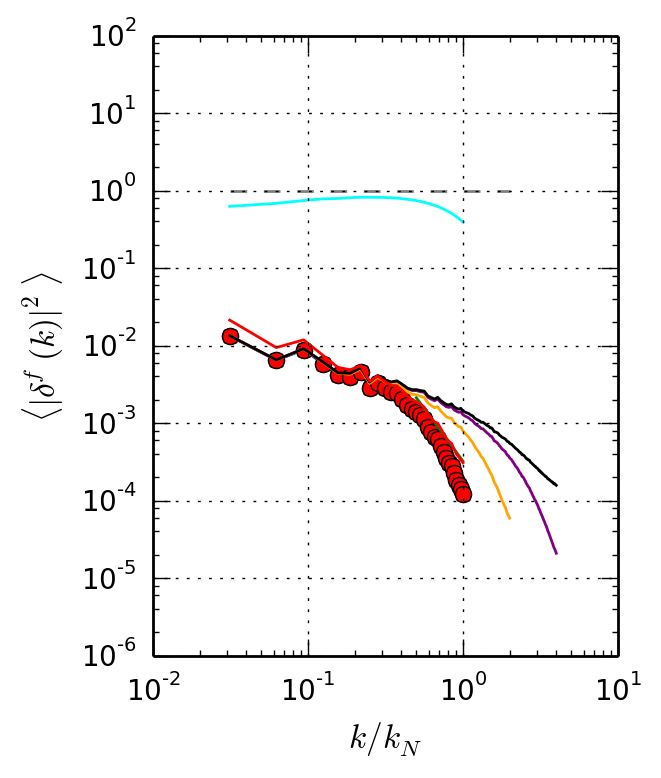

In [67]:
fdir  = "cosmo/"
fpick = "64/"
fdir += fpick

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#set the interpolation
p = 1.0 #NGP
#p = 2.0 #CIC
#p = 3.0 #TSC

#set our fractional tolerance on the power law slope
tol = 1.0e-3

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
kN = 0.5*float(nx)


nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
Pr_array = np.zeros(nk)
dfk_only_array = np.zeros(nk)


k_array = np.arange(nk) / float(nk-1)


#compute <<|d^f(k)|^2> - D^2(k)>
for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                Pr_array[kk] += dfk[i,j,k] - C1k(i,j,k,kN,p)/float(N)
                dfk_only_array[kk] += dfk[i,j,k]

Pr_array /= nk_array
dfk_only_array /= nk_array


#########################################################
#OK, dfk_only_array has been averaged over angle at this point
#begin iterative procedure

#first, compute power-law fit to Pr_array
lnk  = np.log(k_array)
lnPr = np.log(Pr_array)

ki = np.where( (k_array>=0.5)&(k_array<=1.0) )[0]
print ki

pfit = np.polyfit(lnk[ki],lnPr[ki],1)
print pfit

#store initial power law fit
beta = pfit[0]
B = np.exp(pfit[1])
print(B,beta)

#next, compute C2(k) assuming power law for Pk
kipl = np.where(k_array>0)[0]
Pkpl = np.zeros(nk)
Pkpl[kipl] = np.exp(np.poly1d(pfit)(np.log(k_array[kipl])))
    
#iterate until convergence
P0  = np.zeros(nk)
count = 0
flag  = 1
while (flag):
    A = B
    alpha = beta
    C2k = np.zeros(nk)
    n0_array = np.zeros(nk)
    print("iteration %d..." % (count))


    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    if(kk>0):
                        n0_array[kk] += 1.0
                        for n in range(10):
                            #we add in the direction of kk
                            C2k[kk] += Wkp(i+2*kN*n*i/kk,j+2*kN*n*j/kk,k+2*kN*n*k/kk,kN,p)**2 * Pplaw(kk + 2*kN*n,kN,A,alpha)
                
                
    #renormalize C2k by P(k)
    C2k /= n0_array
    C2k /= Pplaw(k_array,1.,A,alpha)
    C2k[0] = 1.
    
    #get the updated P0
    P0[:] = Pr_array[:]/C2k[:]


    #Now fit alpha again
    lnk  = np.log(k_array)
    lnP0 = np.log(P0)
    ki = np.where( (k_array>=0.5)&(k_array<=1.0) )[0]

    pfit = np.polyfit(lnk[ki],lnP0[ki],1)
    beta = pfit[0]
    B = np.exp(pfit[1])
    dalpha = (beta-alpha)/beta
    print(A,alpha,B,beta,dalpha)

    #prevent infinite iterations
    count += 1
    if(count>10):
        flag = 0
    
    #if alpha changes by a small tolerance, then break
    if(np.abs(dalpha)<tol):
        flag = 0


#print the final result
print ("Final slope is alpha = %f, dalpha = %f" % (alpha,dalpha))

#P0 now contains our estimate of the power spectrum

#Begin the figure
fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()

#plt.plot(k_array,C1k,':',color="0")
#plt.plot(k_array,dfk_array/nk_array * float(N))
plt.plot(k_array,Pr_array)


yerr = Pr_array/nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, Pr_array, yerr=yerr, fmt='o')
plt.errorbar(k_array, dfk_only_array, yerr=yerr, fmt='o', color='red')



#ki = np.where(k_array>0)[0]
plt.plot(k_array[ki], np.exp(np.poly1d(pfit)(np.log(k_array[ki]))),color='green')

fname = 'Pr_256.txt'
k_256, Pr_256 = read_two_arrays(fname)
fname = 'Pr_128.txt'
k_128, Pr_128 = read_two_arrays(fname)
fname = 'Pr_64.txt'
k_64, Pr_64 = read_two_arrays(fname)
fname = 'Pr_256ngp.txt'
k_256ngp, Pr_256ngp = read_two_arrays(fname)

plt.plot(k_256*256./float(nx),Pr_256,color="purple")
plt.plot(k_128*128./float(nx),Pr_128,color="orange")
plt.plot(k_256ngp*256./float(nx),Pr_256ngp,color="black")

plt.plot(k_array,P0,color="red")                    

plt.plot(k_array,C2k,color="cyan")                    



#plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')


plt.ylim([1.0e-6,1.0e2])
plt.xlim([0.01,10])
plt.yscale('log')
plt.xscale('log')
plt.axes().set_aspect('0.5')
plt.ylabel(r'$\langle |\delta^f(k)|^2\rangle$')
plt.xlabel(r'$k/k_{N}$')
print Pr_array/nk_array * float(N)


#fname_out = "P0."+fpick[:-1]+".txt"
#out = write_two_arrays(fname_out,k_array,P0)

In [61]:
print p

3.0


## Comparison of the corrected $P(k)$ as a function of the size of the interpolated grid and the interpolation method

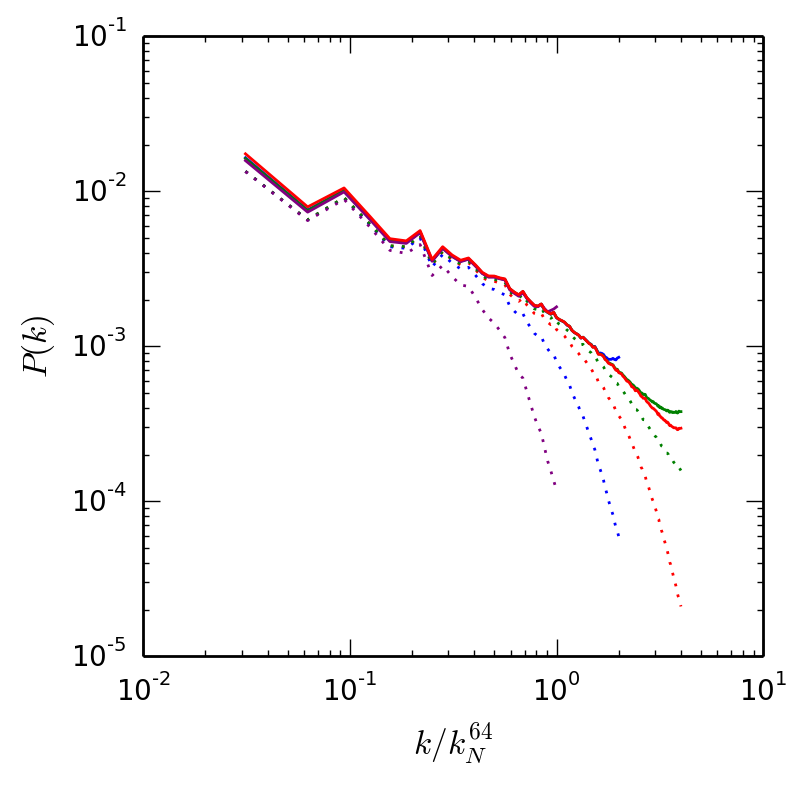

In [74]:
#Plot the cosmological results
fname = 'Pr_256.txt'
k_256, Pr_256 = read_two_arrays(fname)
fname = 'Pr_128.txt'
k_128, Pr_128 = read_two_arrays(fname)
fname = 'Pr_64.txt'
k_64, Pr_64 = read_two_arrays(fname)
fname = 'Pr_256ngp.txt'
k_256ngp, Pr_256ngp = read_two_arrays(fname)

fname = 'P0.256.txt'
k0_256, P0_256 = read_two_arrays(fname)
fname = 'P0.128.txt'
k0_128, P0_128 = read_two_arrays(fname)
fname = 'P0.64.txt'
k0_64, P0_64 = read_two_arrays(fname)
fname = 'P0.256.ngp.txt'
k0_256ngp, P0_256ngp = read_two_arrays(fname)

nx = 64.

plt.plot(k_256*256./float(nx),Pr_256,":",color="red")
plt.plot(k_128*128./float(nx),Pr_128,":",color="blue")
plt.plot(k_256ngp*256./float(nx),Pr_256ngp,":",color="green")
plt.plot(k_64*64./float(nx),Pr_64,":",color="purple")

plt.plot(k0_128*128./float(nx),P0_128,color="blue")
plt.plot(k0_256ngp*256./float(nx),P0_256ngp,color="green")
plt.plot(k0_64*64./float(nx),P0_64,color="purple")
plt.plot(k0_256*256./float(nx),P0_256,color="red")



#plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')


plt.ylim([1.0e-5,1.0e-1])
plt.xlim([0.01,10])
plt.yscale('log')
plt.xscale('log')
plt.axes().set_aspect('0.75')
plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k/k^{64}_{N}$')
plt.show()
